# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download from Atlas and Load Data

In [3]:
from dpet.ensemble import Ensemble


ensembles = [
    Ensemble("PED00156e001", database='ped'),
    Ensemble("PED00157e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.top.pdb'),
    Ensemble("PED00158e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/testington'

analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories()

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
PED00156e001 chain ids: ['A']
Generating trajectory for PED00156e001...
Generated trajectory saved to C:\Users\nikol\Documents\test_dir\testington.
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x2822c8c0e80>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x282400d3eb0>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x2823ffd3a90>}

In [4]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00156e001 trajectory.
50 conformations sampled from PED00157e001 trajectory.
50 conformations sampled from PED00158e001 trajectory.


{'PED00156e001': <mdtraj.Trajectory with 50 frames, 941 atoms, 59 residues, without unitcells at 0x2823863f220>,
 'PED00157e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x2822ca367d0>,
 'PED00158e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x282305bbfd0>}

## Featurization

In [5]:
analysis.extract_features(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (50, 116)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (50, 116)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (50, 116)
Feature names: ['GLU2-PHI', 'ALA3-PHI', 'ILE4-PHI', 'ALA5-PHI', 'LYS6-PHI', 'HIS7-PHI', 'ASP8-PHI', 'PHE9-PHI', 'SER10-PHI', 'ALA11-PHI', 'THR12-PHI', 'ALA13-PHI', 'ASP14-PHI', 'ASP15-PHI', 'GLU16-PHI', 'LEU17-PHI', 'SER18-PHI', 'PHE19-PHI', 'ARG20-PHI', 'LYS21-PHI', 'THR22-PHI', 'GLN23-PHI', 'ILE24-PHI', 'LEU25-PHI', 'LYS26-PHI', 'ILE27-PHI', 'LEU28-PHI', 'ASN29-PHI', 'MET30-PHI', 'GLU31-PHI', 'ASP32-PHI', 'ASP33-PHI', 'SER34-PHI', 'ASN35-PHI', 'TRP36-PHI', 'TYR37-PHI', 'ARG38-PHI', 'ALA39-PHI', 'GLU40-PHI', 'LEU41-PHI', 'ASP42-PHI', 'GLY43-PHI', 'LYS44-PHI', 'GLU45-PHI', 'GLY46-PHI', 'LEU47-PHI', 'ILE48-PHI', 'PRO49-PHI', 'SER50-PHI', 'ASN51-PHI', 'TYR52-PHI', 'ILE53-PHI', 'GLU54-PHI', 'MET55-PHI', 'L

{'PED00156e001': array([[-2.055363  , -2.4502301 , -1.3935413 , ...,  2.166932  ,
          3.0518012 , -0.9185992 ],
        [-1.6485761 , -1.5633726 , -1.0886492 , ..., -0.41427755,
         -1.4421862 , -1.0309005 ],
        [-1.6637414 , -1.6206728 , -1.7940595 , ..., -0.19010207,
          0.6998877 ,  1.7117194 ],
        ...,
        [ 1.2247604 ,  1.0223091 , -2.489234  , ...,  1.9194111 ,
          2.1312366 ,  1.0863192 ],
        [-2.4795098 , -2.012126  ,  1.1866306 , ...,  1.4275305 ,
          1.3126214 , -2.9818678 ],
        [-2.7043016 , -2.3434734 , -1.5887493 , ...,  2.1431072 ,
         -1.0010831 , -1.2415656 ]], dtype=float32),
 'PED00157e001': array([[-1.5628695 , -1.1853529 , -1.1232009 , ..., -0.43285525,
         -2.6464052 , -1.0290296 ],
        [-1.7989858 , -1.4205993 , -1.3421825 , ...,  2.5521004 ,
         -0.9508768 , -0.6833207 ],
        [-1.0125167 , -1.6109473 , -1.264203  , ...,  3.0548837 ,
          0.17966048,  2.3159144 ],
        ...,
       

## Dimensionality Reduction

In [6]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (150, 116)
tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 50
Best Number of Clusters: 2


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

array([[ 2.82909083e+00, -3.07987404e+00],
       [ 1.11305618e+00, -3.27725410e-02],
       [ 1.14073217e+00, -8.07949185e-01],
       [ 1.12516832e+00, -1.01508629e+00],
       [ 1.33318663e+00, -4.14179182e+00],
       [ 2.41824508e+00,  5.72100542e-02],
       [ 2.22465801e+00, -3.01866388e+00],
       [ 7.49082208e-01,  5.67176282e-01],
       [ 1.45348334e+00, -4.62041283e+00],
       [ 3.21877933e+00, -1.91664040e+00],
       [ 2.31085443e+00, -4.34507281e-02],
       [ 2.90051246e+00, -3.51619339e+00],
       [ 2.27122068e+00, -2.45437336e+00],
       [ 1.56967700e+00, -4.04622602e+00],
       [ 1.47911322e+00,  1.71036020e-01],
       [ 2.89058518e+00, -4.99985576e-01],
       [ 1.06165409e+00,  7.75950491e-01],
       [ 3.43795276e+00, -2.36746097e+00],
       [ 2.84363294e+00, -6.44968867e-01],
       [ 2.02422023e+00,  5.93791008e-01],
       [ 3.20954847e+00, -9.71971273e-01],
       [ 1.60526752e+00, -3.56545019e+00],
       [ 1.83495593e+00, -8.68504524e-01],
       [ 2.

## Analysis

C:\Users/nikol/Documents/GitHub/EnsembleTools\dpet\visualization.py:233: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\nikol\AppData\Local\Temp\ipykernel_24536\518842094.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


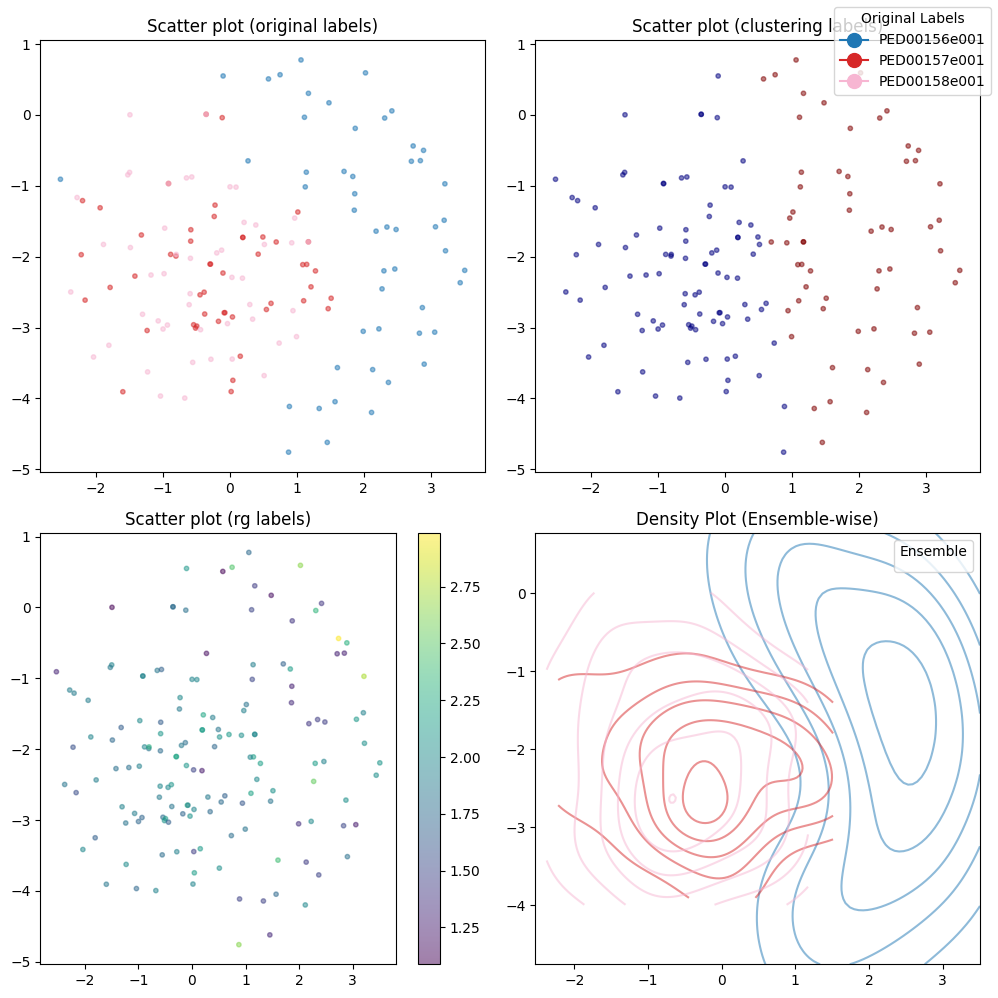

In [7]:
from matplotlib import pyplot as plt
from dpet.visualization import Visualization


vis = Visualization(analysis)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

vis.dimensionality_reduction_scatter(ax=ax, kde_by_ensemble=True)

fig.show()

In [8]:
analysis.get_features('phi_psi')

{'PED00156e001': array([[-2.055363  , -2.4502301 , -1.3935413 , ...,  2.166932  ,
          3.0518012 , -0.9185992 ],
        [-1.6485761 , -1.5633726 , -1.0886492 , ..., -0.41427755,
         -1.4421862 , -1.0309005 ],
        [-1.6637414 , -1.6206728 , -1.7940595 , ..., -0.19010207,
          0.6998877 ,  1.7117194 ],
        ...,
        [ 1.2247604 ,  1.0223091 , -2.489234  , ...,  1.9194111 ,
          2.1312366 ,  1.0863192 ],
        [-2.4795098 , -2.012126  ,  1.1866306 , ...,  1.4275305 ,
          1.3126214 , -2.9818678 ],
        [-2.7043016 , -2.3434734 , -1.5887493 , ...,  2.1431072 ,
         -1.0010831 , -1.2415656 ]], dtype=float32),
 'PED00157e001': array([[-1.5628695 , -1.1853529 , -1.1232009 , ..., -0.43285525,
         -2.6464052 , -1.0290296 ],
        [-1.7989858 , -1.4205993 , -1.3421825 , ...,  2.5521004 ,
         -0.9508768 , -0.6833207 ],
        [-1.0125167 , -1.6109473 , -1.264203  , ...,  3.0548837 ,
          0.17966048,  2.3159144 ],
        ...,
       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


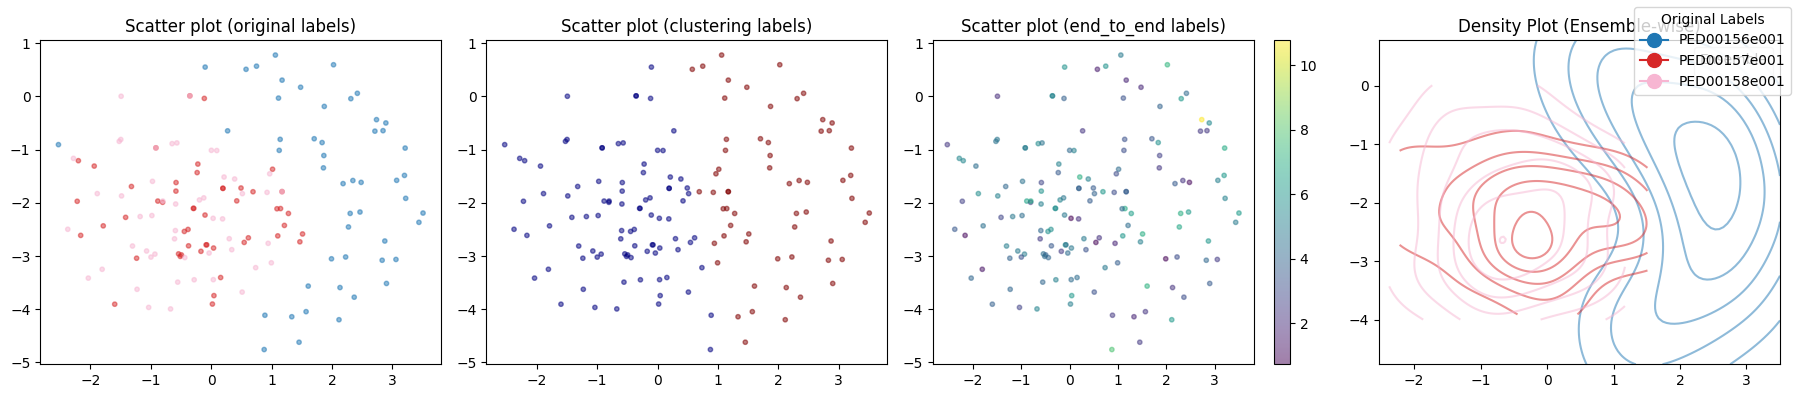

In [9]:
vis.dimensionality_reduction_scatter(color_by="end_to_end", save=False, kde_by_ensemble=True)